# Falied 2D equalization analysis

### 3x3 Lieb no waist UT

3x3 Lieb is a special case, as its t is always equal fixing t might cause a conter effect to equalization.

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


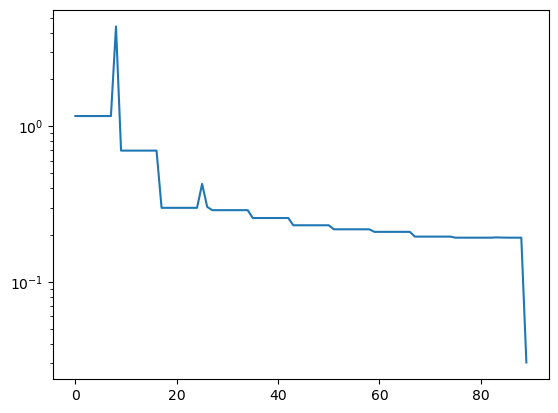

In [9]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")


plt.plot(c, '-')
plt.yscale('log')


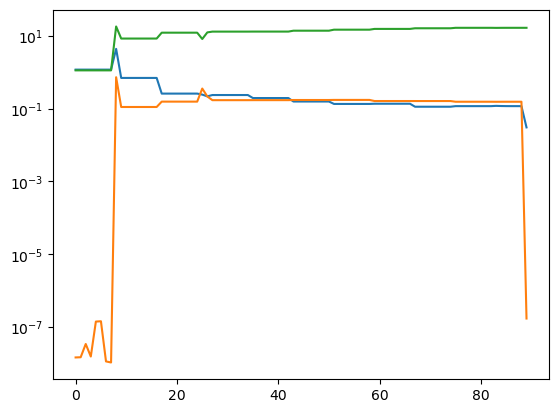

In [10]:
ct = rep.a(report, "Equalization_Log", "cost_func_by_terms")
plt.plot(ct, '-')
plt.yscale('log')


H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.92s.
H_solver: eigenstates memory usage:  1.27 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.41s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.94s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.70s.
H_solver: eigenstates memory usage:  1.19 MiB.
Single band optimization time: 0.024605989456176758s.
Calcu

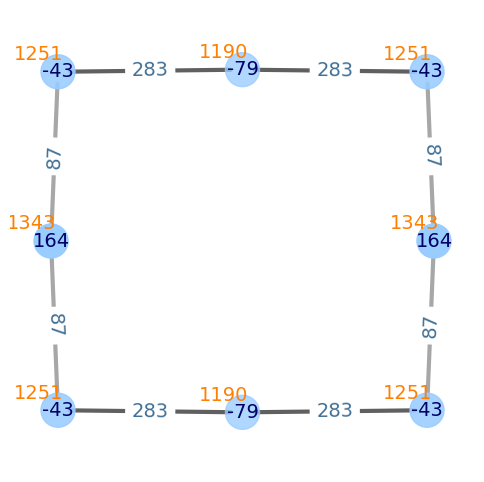

In [8]:
G.draw_graph()


In [7]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, np.min)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)



Equalize: 1-th equalization trap depths: [1.01316865 1.02624125 0.99973988]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 31 20] is set.
DVR: R0=[4.52 4.69 7.2 ]w is set.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.83s.
H_solver: eigenstates memory usage:  1.27 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.15s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.75s.
H_solver: eigenstates memory usage:  1.23 MiB.


In [6]:
print(txTarget, tyTarget, Utarget)


0.08659897279849012 0.28294853653079205 1.343458253837605


In [4]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=-1)
E, W, p = G.eigen_basis()
G.verbosity = 0
# G.singleband_Hubbard(u=True, offset=True)
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)
print('detV =', la.det(V))



Equalize: -2-th equalization trap depths: [1.08086781 1.0334229  1.09678034]
Equalize: -2-th equalization trap centers:
[[-1.00713708 -0.99339516]
 [-0.96189755  0.        ]
 [ 0.         -1.00298156]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 31 20] is set.
DVR: R0=[4.52 4.69 7.2 ]w is set.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.79s.
H_solver: eigenstates memory usage:  1.27 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.97s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.76

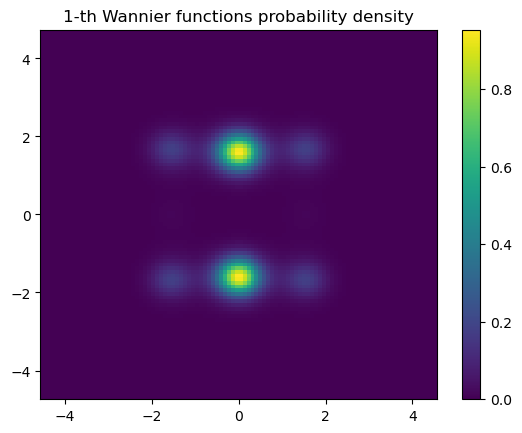

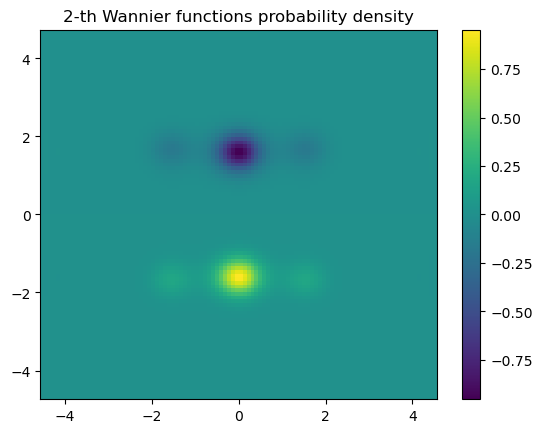

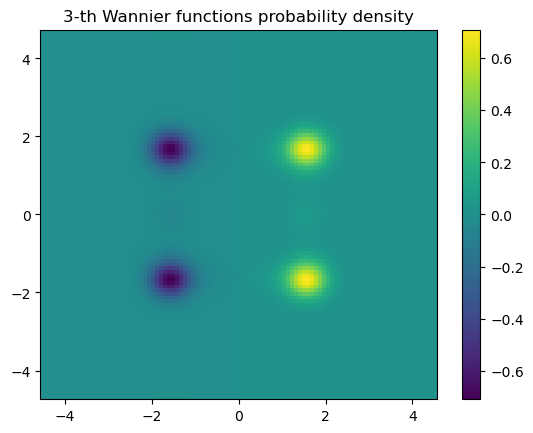

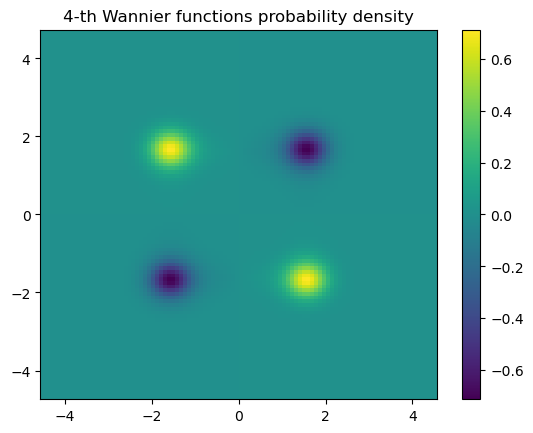

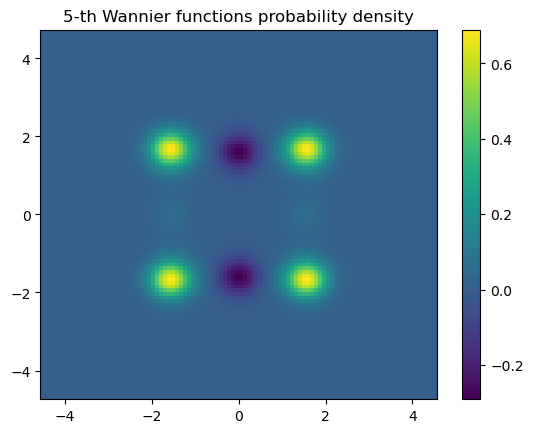

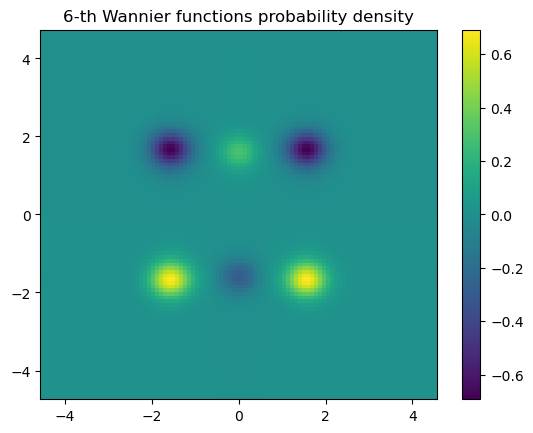

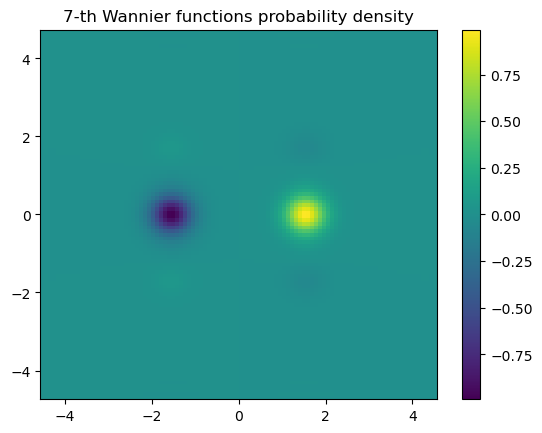

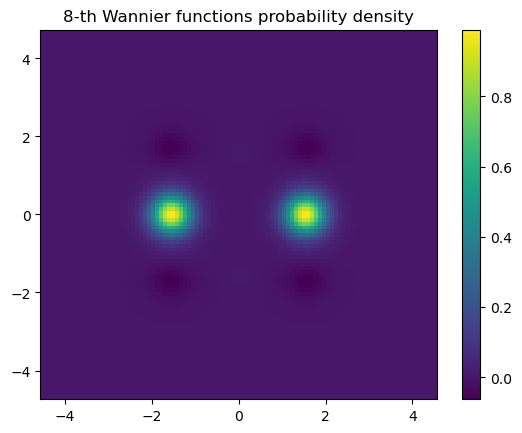

In [24]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[i], p[i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


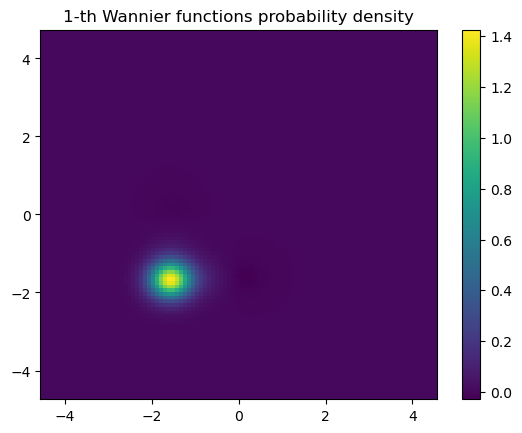

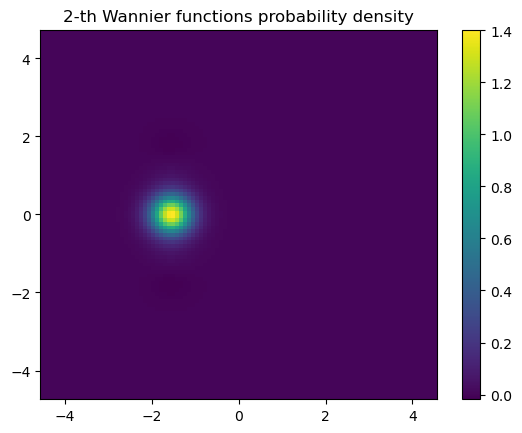

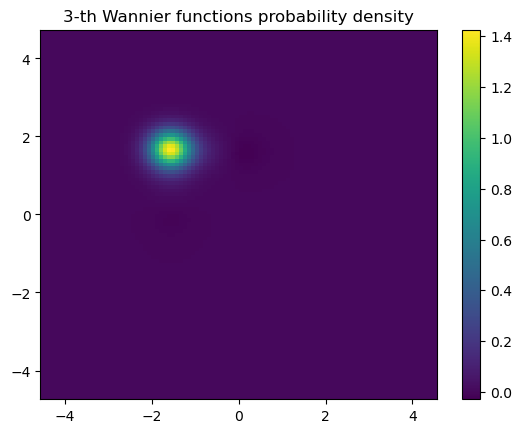

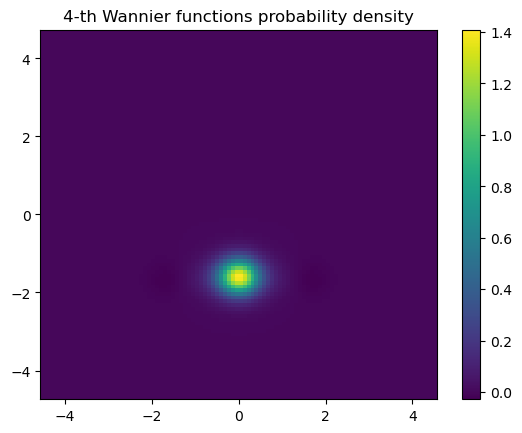

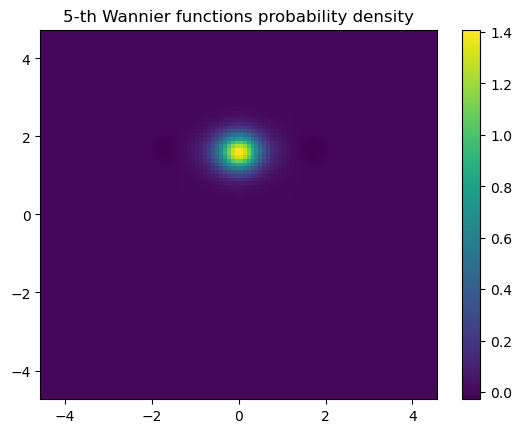

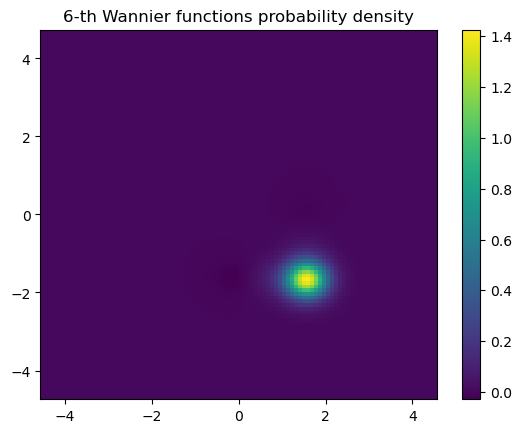

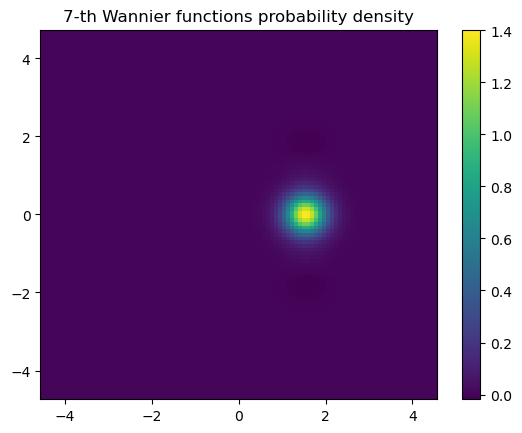

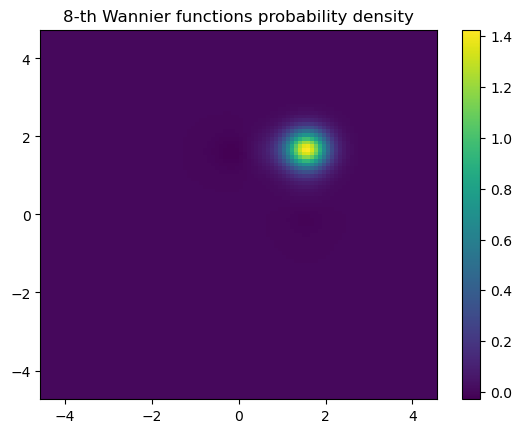

In [23]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, G, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


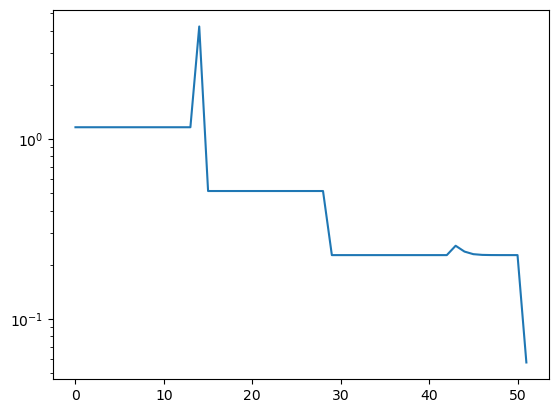

In [1]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1520, 1690),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")


plt.plot(c, '-')
plt.yscale('log')


In [2]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, np.min)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)



Equalize: 1-th equalization trap depths: [1.01316865 1.02624125 0.99973988]
Equalize: 1-th equalization waists:
[[1. 1.]
 [1. 1.]
 [1. 1.]]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 31 20] is set.
DVR: R0=[4.52 4.69 7.2 ]w is set.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.14s.
H_solver: eigenstates memory usage:  1.27 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.65s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Ti


Equalize: 51-th equalization trap depths: [1.0444168  1.02889971 1.05396719]
Equalize: 51-th equalization waists:
[[0.9830775  0.9810782 ]
 [1.00338251 0.99898528]
 [0.97994252 0.98510807]]
Equalize: 51-th equalization trap centers:
[[-1.01003165 -0.99327696]
 [-1.00827136  0.        ]
 [ 0.         -1.00066283]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 31 20] is set.
DVR: R0=[4.52 4.69 7.2 ]w is set.
V = [-0.02984559  0.89182405 -0.02984559 -0.83213289 -0.83213286 -0.02984557
  0.89182405 -0.02984559]
t = [0.08644324 0.08644324 0.22099623 0.22099623 0.2209962  0.08644324
 0.22099624 0.08644324]
U = [1.34704345 1.34384806 1.34704345 1.33493087 1.33493087 1.34704345
 1.34384806 1.34704345]
V_err = 7.046747494116049
t_err = 0.21895995625627446
U_err = 0.05732469676643555
fval = 0.2263395310216786
E = [array([-0.72481227, -0.72480072, -0.70788582, -0.70764166, -0.70546243,
       -0.7052043 , -0.68947401, -0.68944863])]
parity = [array(

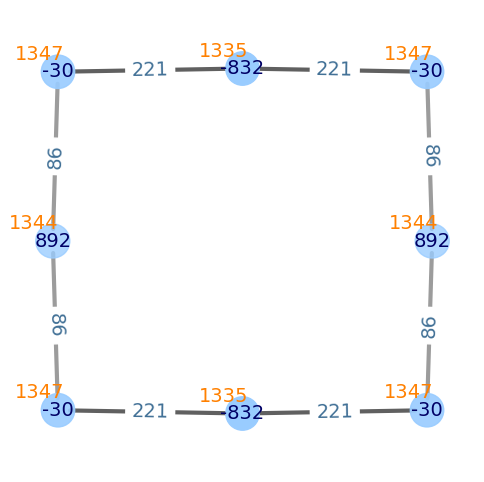

In [5]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=51)
G.verbosity = 0
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
G.draw_graph(A=G.A, U=G.U)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, links, (txTarget, tyTarget)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')


In [6]:
print(txTarget, tyTarget, Utarget)


0.08659897265072956 0.2829485358215238 1.3434582538376614
